### <p style="text-align: right;"> &#9989; Elizabeth Walter</p>

# __CMSE  201 &ndash; Spring 2021__

<img src="https://cmse.msu.edu/sites/_cmse/assets/Image/image002.jpg"
     alt="CMSE Logo"
     align="right" 
     height="100" 
     width="100" />
     
# Homework 4: Fitting data using NumPy and SciPy

## Goals

### By the end of the homework assignment you will have practiced:

1. Loading in data
2. Polynomial fitting using NumPy
3. Fitting curves using SciPy
4. Plotting data and the correspoding best-fit results
5. Calculating residuals when fitting a models to data

## Assignment instructions

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

**This assignment is due at 11:59pm on Friday, March 26.** 

It should be uploaded to D2L in the approach "Homework" submission folder.  Submission instructions can be found at the end of the notebook as well.

## Grading

- Academic Integrity (1 pt)
- Part 1 (20 pts)
- Part 2 (24 pts)

**Total:** 45 pts


---
# Academic integrity statement (1 point)

In the markdown cell below, put your personal academic integrity statement (composed during the Day04 In-Class Assignment). By including this statement, you are confirming that the work you submit in the assignment is wholly your own.  

<font size=6 color="#009600">&#9998;</font> I, __Elizabeth Walter__, value honesty, fairness, integrity, and equity above little else. I expect these things from myself and my community, and cheating, along with other unethical behavior, is incompatible with such values. I commit to being fair and honest by completing all my assignments myself and citing sources when I receive help. I am aware of and will abide by the MSU ethical standards for integrity.

---
## Part 1: Fitting Piece-wise Linear Functions to Data
In this problem, we will look at fitting more unusual functions to data.

### &#9989;&nbsp; Question 1.1: Setting up your Python modules (3 points)

In this homework, you will be mainly using Matplotlib, Pandas, NumPy, and SciPy's `curve_fit` function. Make sure to include all of the important `import` comments here.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit

### &#9989;&nbsp; Question 1.2: Generate and Plot Data (4 points)

Consider a function $y=f(x)$ such that $f(x) = 2x$ for $0 \leq x \leq 0.5$ and $f(x)=2-2x$ for $0.5 \leq x \leq 1$. Plot this function over 200 equispaced points ($x$) in the range of $x = $ 0 to 1 (end points included). Then, generate a noisy version of this function by adding Gaussian noise with mean zero and standard deviation 0.2 to all of the $y$ values from this function. Essentially, make $y_{noisy} = f(x) \, + $ Gaussian($x$). Plot the noisy data (versus $x$ values) in a new plot. Label all axes on the plots.

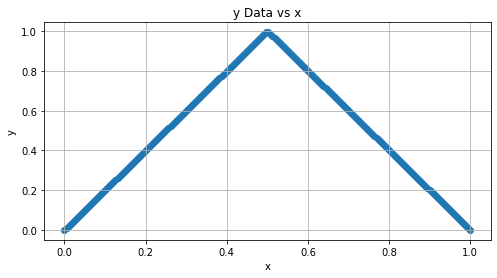

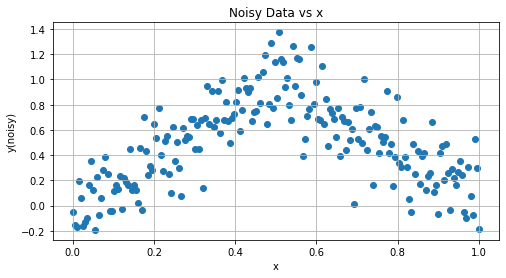

In [29]:
# create function to create y/f(x)
# gaussian/noise from https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html & day 12

x = np.linspace(0,1,200)

y = np.array([])
noise = np.random.normal(0,0.2,len(x))

for i in x:
    if i >= 0 and i <= 0.5:
        fx = 2*i
    else:
        fx = 2 - 2*i
    y = np.append(y, fx)    

ynoisy = y + noise

plt.figure(figsize=(8,4))
plt.scatter(x, y)  
plt.ylabel('y')
plt.xlabel('x')
plt.title('y Data vs x')
plt.grid()
plt.show()

plt.figure(figsize=(8,4))
plt.scatter(x, ynoisy)  
plt.ylabel('y(noisy)')
plt.xlabel('x')
plt.title('Noisy Data vs x')
plt.grid()
plt.show()

---
### &#9989;&nbsp; Question 1.3: Polynomial Fitting (5 points)

How would you use NumPy's `polyfit` function to fit a model like $f(x)$ (i.e., polynomial in two pieces) to the corrupted or noisy data? Explain your approach. Use only first order polynomials for this. Print all the fitted model parameters. Then use `poly1d` to help **plot the data together with the best fit model**. Include a legend to make it clear what information represents the data and what information represents the best fit. *Hint: More than one type of polynomial may offer a good fit to this type of data.*

<font size=+3>&#9998;</font> 
* Need to do polyfit in 2 parts, for x > .5 and x < .5
* Then do poly1d for 2 parts and plot together

parameters for x < 0.5: [ 2.10872343 -0.06342644]
parameters for x > 0.5: [-1.84018288  1.90796126]


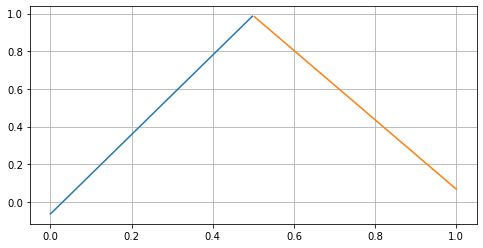

In [30]:
x1 = x[x < 0.5]
x2 = x[x > 0.5]
ynoisy1 = ynoisy[x < 0.5]
ynoisy2 = ynoisy[x > 0.5]

parameters1 = np.polyfit(x1, ynoisy1, 1)
parameters2 = np.polyfit(x2, ynoisy2, 1)

print('parameters for x < 0.5:', parameters1)
print('parameters for x > 0.5:', parameters2)

function1 = np.poly1d(parameters1)
function2 = np.poly1d(parameters2)

expected1 = function1(x1)
expected2 = function2(x2)

plt.figure(figsize=(8,4))
plt.plot(x1, expected1)
plt.plot(x2, expected2)
plt.grid()
plt.show()

---
### &#9989;&nbsp; Question 1.4: Using Curve Fit for the data (7 points)

Write a function called `fitting_function` that takes the following arguments: $x$, $m_1$, $b_1$, $m_2$, $b_2$, where $x$ is a NumPy array and the rest are all floating point parameter values corresponding to the slopes of the lines/pieces and their intercepts. The function should return an array with values $f(x) = m_1*x + b_1$ when $0 \leq x \leq 0.5$ and $f(x) = m_2*x + b_2$ where $0.5 \leq x \leq 1$.

Use SciPy's `curve_fit` function to find the best fit model parameters for the corrupted data using your `fitting_function`. **Plot the data and the best fit. Label all axes and include a legend. Also print the resulting parameters.**

In [31]:
print(len(x)) #cannot figure out why both of these are len 200 but ycurve has a len of 201
print(len(ynoisy))

def fitting_function(x,m1,b1,m2,b2):
    ycurve = np.array([])
    for i in x < 0.5:
        ycurve1 = m1 * (i + b1)
        ycurve = np.append(ycurve, ycurve1)
    else:
        ycurve2 = m2 * (i + b2)
        ycurve = np.append(ycurve, ycurve2)
    print(len(ycurve))
    return ycurve

popt, pcov = curve_fit(fitting_function, x, ynoisy)
ynoisy_fit = fitting_function(x, popt[0], popt[1], popt[2], popt[3])

print('m1:', popt[0])
print('b1:', popt[1])
print('m2:', popt[2])
print('b2:', popt[3])

plt.scatter(x,y)
plt.plot(x, ynoisy_fit, label='fitted model')
plt.xlabel('x')
plt.ylabel('Noisy Data')
plt.legend()
plt.show()

200
200
201


ValueError: operands could not be broadcast together with shapes (201,) (200,) 

---
### &#9989;&nbsp; Question 1.5: How good are the estimates? (1 point)
Comment on how close the parameter estimates in Questions 1.3 and 1.4 are to the values used to generate the data.


<font size=+3>&#9998;</font> * The parameter estimates from 1.3 are slightly off but not too far off.

---
## Part 2: Fitting Models to Real Data
In this problem, we will look at fitting models to real weather data. The data is available at [Fivethirtyeight.](https://github.com/fivethirtyeight/data/tree/master/us-weather-history) Download and check out the file `KMDW.csv` from D2L. You will use your model-fitting skills to see if you can find a good mathematical model for how the data behaves. 

### &#9989;&nbsp; Question 2.1: Reading and inspecting the data (3 points)

Read in the data in `KMDW.csv` using Pandas. Print out a few rows of the data as well as the summary statistics of the data (mean, standard deviation, etc.) to get a sense of the data.

In [32]:
kmdw = pd.read_csv('KMDW.csv')
kmdw.head()

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
0,2014-7-1,76,68,84,67,84,49,103,1982.0,1956.0,0.04,0.11,1.23
1,2014-7-2,66,58,74,67,84,48,99,1930.0,1970.0,0.12,0.10,2.50
2,2014-7-3,66,57,75,67,84,50,102,1940.0,1949.0,0.05,0.11,1.38
3,2014-7-4,70,60,79,67,84,49,101,1940.0,2012.0,0.00,0.11,0.94
4,2014-7-5,71,63,79,67,84,46,103,1972.0,2012.0,0.01,0.13,1.18


In [33]:
kmdw.describe()

,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,364.000000,364.000000,365.000000,365.000000,365.000000
mean,51.049315,42.882192,58.712329,43.539726,59.471233,21.191781,83.183562,1959.662088,1968.912088,0.098740,0.107096,1.674630
std,20.352735,19.739925,21.427029,17.299136,18.807071,23.142332,15.615284,22.896788,25.888040,0.323879,0.025329,0.919481
min,1.000000,-7.000000,7.000000,18.000000,31.000000,-25.000000,51.000000,1873.000000,1928.000000,0.000000,0.050000,0.340000
25%,35.000000,30.000000,39.000000,27.000000,41.000000,-1.000000,69.000000,1940.000000,1947.000000,0.000000,0.090000,1.080000
50%,53.000000,44.000000,62.000000,44.000000,61.000000,26.000000,87.000000,1958.000000,1970.000000,0.000000,0.110000,1.410000
75%,70.000000,60.000000,79.000000,60.000000,78.000000,44.000000,97.000000,1979.250000,1990.000000,0.040000,0.130000,2.050000
max,83.000000,74.000000,94.000000,68.000000,85.000000,58.000000,109.000000,2015.000000,2014.000000,3.310000,0.150000,6.160000


### &#9989;&nbsp; Question 2.2: Convert date format (2 points)

The `date` column has the year-month-day format. Convert this to the `ordinal` format so you have a single number associated with each date. Add this as a new column to the dataframe. We will use this as the independent variable for regression.

In [34]:
# from https://stackoverflow.com/questions/20576618/pandas-datetime-column-to-ordinal & help from TA in office hours/help room 

import datetime

kmdw['odate'] = pd.to_datetime(kmdw['date'])
kmdw['odate'] = kmdw['odate'].map(datetime.datetime.toordinal)
kmdw

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation,odate
0,2014-7-1,76,68,84,67,84,49,103,1982.0,1956.0,0.04,0.11,1.23,735415
1,2014-7-2,66,58,74,67,84,48,99,1930.0,1970.0,0.12,0.10,2.50,735416
2,2014-7-3,66,57,75,67,84,50,102,1940.0,1949.0,0.05,0.11,1.38,735417
3,2014-7-4,70,60,79,67,84,49,101,1940.0,2012.0,0.00,0.11,0.94,735418
4,2014-7-5,71,63,79,67,84,46,103,1972.0,2012.0,0.01,0.13,1.18,735419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2015-6-26,66,61,70,66,83,52,98,1945.0,1936.0,0.70,0.12,2.57,735775
361,2015-6-27,68,59,77,66,83,50,102,1981.0,1933.0,0.00,0.12,2.88,735776
362,2015-6-28,70,58,81,66,83,49,104,1938.0,1934.0,0.00,0.12,1.66,735777
363,2015-6-29,71,66,75,66,84,50,97,1943.0,1954.0,0.03,0.11,1.91,735778


### &#9989;&nbsp; Question 2.3: Polynomial fitting (7 points)

Using the NumPy `polyfit` function, fit the first 300 entries of the `actual_mean_temp`, `actual_min_temp`, and `actual_max_temp` columns of the dataframe with polynomials (one for each column). This will be for dates 7/1/2014 through 4/26/2015.  Choose a degree for the polynomial and justify the choice. Use `poly1d` to **plot the data together with the best fit models**. Create three different plots (one for each different temperature statistic) and label all axes and include legends to make clear what information represents the data and what information represents the best fit. The dates should all show up in the yyyy-mm-dd format on the x-axes. Rotate the x-ticks for better display.  When successful, one of the plots should look something like this:
<img src="https://raw.githubusercontent.com/msu-cmse-courses/cmse201-S21-student/master/assets/img/mean_temp_vs_data.png">

In [35]:
import matplotlib.dates as dt
dt.set_epoch("0000-12-31")

RuntimeError: set_epoch must be called before dates plotted.

In [ ]:
date = kmdw['date'][0:300]
odate = kmdw['odate'][0:300]
meant300 = kmdw['actual_mean_temp'][0:300]

meant_params = np.polyfit(odate, meant300, 2)
meant_function = np.poly1d(meant_params)
expected_meant = meant_function(odate)

plt.figure(figsize = (8,4))
plt.plot_date(odate, meant300, label = 'mean data')
plt.plot(odate, expected_meant, color = "orange", label = "fit")
plt.xlabel('Date')
plt.ylabel('Mean Temps')
plt.title('Mean Temp Data & Regression Model - 300 Days')
plt.xticks(rotation = 45)
plt.grid()
plt.legend()
plt.show()

In [ ]:
mint300 = kmdw['actual_min_temp'][0:300]

mint_params = np.polyfit(odate, mint300, 2)
mint_function = np.poly1d(mint_params)
expected_mint = mint_function(odate)

plt.figure(figsize = (8,4))
plt.plot_date(odate, mint300, color = 'green', label = 'min data')
plt.plot(odate, expected_mint, color = "orange", label = "fit")
plt.xlabel('Date')
plt.ylabel('Min Temps')
plt.title('Min Temp Data & Regression Model - 300 Days')
plt.xticks(rotation = 45)
plt.grid()
plt.legend()
plt.show()

In [ ]:
maxt300 = kmdw['actual_max_temp'][0:300]

maxt_params = np.polyfit(odate, maxt300, 3) # used 3rd deg here to show difference in fit from 2nd deg polynomial 
maxt_function = np.poly1d(maxt_params)
expected_maxt = maxt_function(odate)

plt.figure(figsize = (8,4))
plt.plot_date(odate, maxt300, color = 'purple', label = 'max data')
plt.plot(odate, expected_maxt, color = "orange", label = "fit")
plt.xlabel('Date')
plt.ylabel('Max Temps')
plt.title('Max Temp Data & Regression Model - 300 Days')
plt.xticks(rotation = 45)
plt.grid()
plt.legend()
plt.show()

<font size=+3>&#9998;</font> 
* If I chose a 2nd deg polynomial, thats what fit the example/reference plot (seen in 1st plot, mean temps, and 2nd plot, min temps), but a 3rd deg polynomial fits the data much better. Higher than that doesn't fit the trend as well and becomes more difficult to use to predict new values

### &#9989;&nbsp; Question 2.4: How does the model predict forward in time? (3 points)

Use the models learned above for just the initial 300 days for the `actual_mean_temp`, `actual_min_temp`, and `actual_max_temp` columns to predict the temperatures for the remaining dates not used during regression; Essentially, predict the temperatures for 4/27/2015 to the end of the dataset. **Now plot the entire 365 days of actual temperatures together with the models' predictions**. Create three different plots corresponding to the three columns and label all axes and include legends on all plots. The dates should show up in the yyyy-mm-dd format on the x-axes. Rotate the x-ticks for better display. How does the choice of polynomial degree affect the forward predictions?

In [ ]:
#expand on model you created above, not make new one. Extending model but not giving it new data
#basically same as model above just 365 instd of 300 but recreating model not just extending it
#same as 2.3 but only diff is changing to 365
odate365 = kmdw['odate'][0:365]
meant365 = kmdw['actual_mean_temp'][0:365]
mint365 = kmdw['actual_min_temp'][0:365]
maxt365 = kmdw['actual_max_temp'][0:365]


est_meant = meant_function(odate365)
est_mint = mint_function(odate365)
est_maxt = maxt_function(odate365)

plt.figure(figsize = (8,4))
plt.plot_date(odate365, meant365, label = 'mean data - 365')
plt.plot(odate365, est_meant, color = "orange", label = "fit - 360")
plt.xlabel('Date')
plt.ylabel('Mean Temps')
plt.title('Mean Temp Data & Estimated Values Vs Time')
plt.xticks(rotation = 45)
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize = (8,4))
plt.plot_date(odate365, mint365, color = 'green', label = 'min data - 365')
plt.plot(odate365, est_mint, color = "orange", label = "fit - 360")
plt.xlabel('Date')
plt.ylabel('Min Temps')
plt.title('Min Temp Data & Estimated Values Vs Time')
plt.xticks(rotation = 45)
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize = (8,4))
plt.plot_date(odate365, maxt365, color = 'purple', label = 'max data - 365')
plt.plot(odate365, est_maxt, color = "orange", label = "fit - 360")
plt.xlabel('Date')
plt.ylabel('Max Temps')
plt.title('Max Temp Data & Estimated Values Vs Time')
plt.xticks(rotation = 45)
plt.grid()
plt.legend()
plt.show()

<font size=+3>&#9998;</font> 
* Models with 2nd degree polynomial gives forward predictions that more closely follow the trend of the data. The model using a 3rd degree polynomial (3rd plot, max temps) deviates from the data and will make forward predictions much greater than the real values plotted are, and what the values for days beyond 365 days will be

### &#9989;&nbsp; Question 2.5: Effect of the number of data points used to fit model parameters. (1 point)

Try varying the number of data points used to fit the model parameters, e.g., using only the first 100 days or 200 days, etc. for fitting, and then using the estimated models to predict the temperatures for the remaining dates not used for fitting the model. What do you observe with regards to accuracy of future prediction with fewer or more data points to fit the model?

<font size=+3>&#9998;</font> 
* The fewer data points used, the worse of the fit of the model/ more inaccurate the model becomes

### &#9989;&nbsp; Question 2.6: Fitting the Model with all the data. (4 points)

Now try to fit polynomial models (explain the choice of degree) to the entire 365 days worth of data. Do this for the `actual_mean_temp`, `actual_min_temp`, and `actual_max_temp` columns. **Then plot the entire 365 days of actual temperatures together with the new models' predictions**. Create three different plots and follow all plotting guidelines as before. How do these models seem to compare visually to the best fit ones in Question 2.4?

In [ ]:
meant365_params = np.polyfit(odate365, meant365, 2)
meant365_function = np.poly1d(meant365_params)
expected_meant365 = meant365_function(odate365)

mint365_params = np.polyfit(odate365, mint365, 2)
mint365_function = np.poly1d(mint365_params)
expected_mint365 = mint365_function(odate365)

maxt365_params = np.polyfit(odate365, maxt365, 3)
maxt365_function = np.poly1d(maxt365_params)
expected_maxt365 = maxt365_function(odate365)

plt.figure(figsize = (8,4))
plt.plot_date(odate365, meant365, label = 'mean data')
plt.plot(odate365, expected_meant365, color = "red", label = "fit")
plt.xlabel('Date')
plt.ylabel('Mean Temps')
plt.title('Mean Temp Data & Regression Model - 365 Days')
plt.xticks(rotation = 45)
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize = (8,4))
plt.plot_date(odate365, mint365, color = 'green', label = 'min data')
plt.plot(odate365, expected_mint365, color = "red", label = "fit")
plt.xlabel('Date')
plt.ylabel('Min Temps')
plt.title('Min Temp Data & Regression Model - 365 Days')
plt.xticks(rotation = 45)
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize = (8,4))
plt.plot_date(odate365, maxt365, color = 'purple', label = 'max data')
plt.plot(odate365, expected_maxt365, color = "red", label = "fit")
plt.xlabel('Date')
plt.ylabel('Max Temps')
plt.title('Max Temp Data & Regression Model - 365 Days')
plt.xticks(rotation = 45)
plt.grid()
plt.legend()
plt.show()

<font size=+3>&#9998;</font> The models are a much better fit for the data, including/especially the one where the 3rd degree poly is used that was so innacurate before 

### &#9989;&nbsp; Question 2.7: Quantifying Fitting Errors. (3 points)

We can also determine the quality of the fit by computing the *residuals*, $r_i$, as the difference between each known data point $y_i$ and the *expected* $y$ value from the best fit model evaluated at $x_i$, i.e., $$r_i = y_i - f(x_i).$$ 

The residuals can be aggregated over all data points and summarized with the mean squared error $$MSE=\frac{1}{N}\sum_{i=1}^{N}r_i^2.$$ 

Compute using python, the mean squared error over the `actual_mean_temp` column using the model fitted to all 365 days of data and using the model estimated using only the first 300 days of data. Pick the same degree of the polynomial (say 2) for both cases. In which case are residuals smaller (or the fit is better)?  

In [ ]:
#expected_meant365 = f(x[i])
#r365[i] = meant365[i] - expected_meant365[i]
#r300[i] = meant365[i] - est_meant[i]

rsq365 = np.array([])
rsqest = np.array([])

for i in range(len(odate365)):
    r1 = meant365[i] - expected_meant365[i]
    r1sq = r1**2
    rsq365 = np.append(rsq365, r1sq)
mse1 = (1/(len(meant365))) * rsq365.sum()
print('mse fitted:', mse1)

for i in range(len(odate365)):
    r2 = meant365[i] - est_meant[i]
    r2sq = r2**2
    rsqest = np.append(rsqest, r2sq)
mse2 = (1/(len(meant365))) * rsqest.sum()
print('mse estimated:', mse2)

<font size=+3>&#9998;</font> 
* R's are smaller for the model fitted to all 365 days than the model fitted to 300 days, which is what we would expect. 

### &#9989;&nbsp; Question 2.8: Thinking more models. (1 point)

If the data were to be repeated over several years, what pattern would you expect to see in the data? Would a polynomial model make sense for predicting the temperatures over several years? What other functions would you use to model such data?

<font size=+3>&#9998;</font> 
* We would expect to see a bit of an occilation in the temperatures, with them increasing in the summer and decreasing in the winter months. A model like the one we made in class on day 14 using ODE's would probably be better. Also curve_fit?

---
## Assignment Wrap-up

Please fill out the following Google Form before you submit your assignment. **You must completely fill this out in order to receive credit for the assignment!**

**COMPLETE THIS SURVEY through [this link](https://forms.office.com/Pages/ResponsePage.aspx?id=MHEXIi9k2UGSEXQjetVofddd5T-Pwn1DlT6_yoCyuCFUQjRHUktCSEtQR0hLUVU0NkdWUlFSME9OMC4u) or through cell below.**

### ANSWER

Instructors, you can access the responses to the survey [here](https://forms.office.com/Pages/DesignPage.aspx?fragment=FormId%3DMHEXIi9k2UGSEXQjetVofddd5T-Pwn1DlT6_yoCyuCFUQjRHUktCSEtQR0hLUVU0NkdWUlFSME9OMC4u%26Token%3Daafe169eea6d4c18b22d4401ef23158b).


In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/Pages/ResponsePage.aspx?id=MHEXIi9k2UGSEXQjetVofRzD77LVqLNIpscq-NmZsrdUNENQVDBCRDhKVEowQ0dSOFVLWVNNS0Q3NS4u" 
	width="80%" 
	height="1200px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  
Go to the "Homework Assignments" section, find the appropriate submission folder link, and upload it there.


&#169; Copyright 2020, [Department of Computational Mathematics, Science and Engineering](https://cmse.msu.edu) at Michigan State University.